# Foundations Of Deep Learning Project  -- July 27th -- A.Y. 2022/2023
## Image Classification -- Flowers Dataset

* Sara Campolattano 906453
* Induni Sandapiumi Nawarathna Pitiyage 906451


 In this notebook, we present several models developed from scratch, along with a pretrained model, ResNet50, which results are considered for comparison purposes with the results obtained from models from scratch.





# Libraries

In [2]:
!PYTHONHASHSEED=0
# Import TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.__version__

from google.colab import drive
import tarfile
from time import time
from shutil import copyfile


# Import other modules
from matplotlib import pyplot as plt
import zipfile
import seaborn as sns
from shutil import copyfile
from time import time
import numpy as np
import random as python_random
import pandas as pd
import numpy as np
import math
import pathlib



np.random.seed(0)
python_random.seed(0)
tf.random.set_seed(0)

# Data Loading

In [3]:
drive.mount('/content/gdrive')
dataset_url = " http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
base_path = pathlib.Path(data_dir)
base_path

Mounted at /content/gdrive
228813984/228813984 [==============================] - 8s 0us/step


PosixPath('/root/.keras/datasets/flower_photos')

# Data Preprocessing

In [4]:
train_dataset = keras.preprocessing.image_dataset_from_directory(base_path,
                                                            image_size=(227,227),
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='training',
                                                            validation_split = 0.2,
                                                            shuffle=True,
                                                            seed=12345)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [5]:
val_data = keras.preprocessing.image_dataset_from_directory(base_path,
                                                            image_size=(227,227),
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='validation',
                                                            validation_split = 0.2,
                                                            shuffle=True,
                                                            seed=12345)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [6]:
val_batch = tf.data.experimental.cardinality(val_data)
test_dataset = val_data.take((val_batch) // 3)
val_dataset = val_data.skip((val_batch) // 3)

# Data Exploration

In [7]:
class_names = train_dataset.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [8]:
# Total number of images
image_count = len(list(base_path.glob('*/*.jpg')))
print(image_count)

3670


## Visualizing a Sample

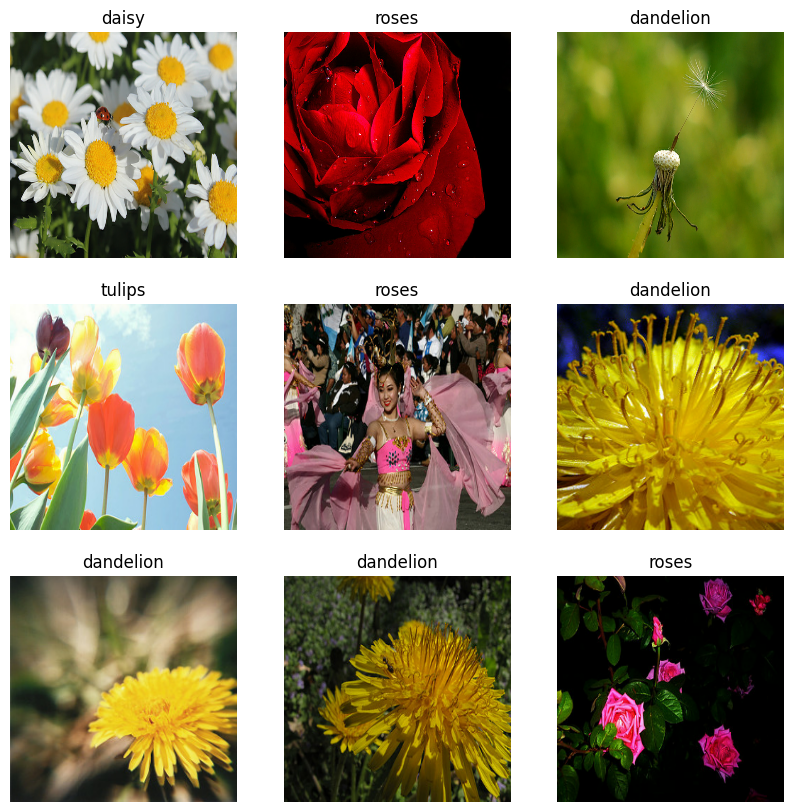

In [9]:
#Visualizing Data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    class_index = np.argmax(labels[i])  # convert one-hot label to class index
    plt.title(class_names[class_index])
    plt.axis("off")

## Classes Distribution

Text(0.5, 1.0, 'Image Class Distribution for Training Dataset')

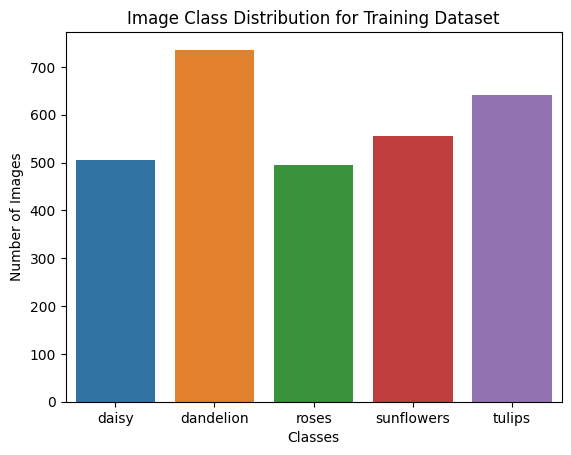

In [ ]:
# Class distribution for training dataset
def count_im(train_dataset):
  train_clz_counts = [0] * len(class_names)
  for images, labels in train_dataset:
      batch_size = images.shape[0]
      for i in range(batch_size):
          train_clz_index = tf.argmax(labels[i]).numpy()
          train_clz_counts[train_clz_index] += 1

  return train_clz_counts

train_clz_counts = count_im(train_dataset)

classes = class_names
Images = train_clz_counts
list_of_tuples = list(zip(classes, Images))
df = pd.DataFrame(list_of_tuples,
                  columns=['classes', 'Images'])

sns.barplot(data=df, x='classes', y='Images')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Image Class Distribution for Training Dataset')

Text(0.5, 1.0, 'Image Class Distribution for Test Dataset')

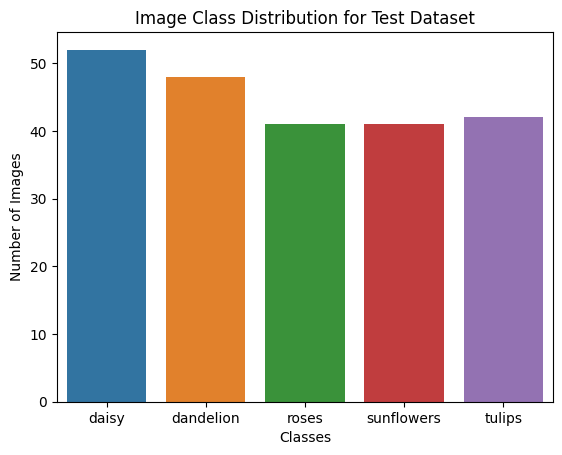

In [ ]:
# Class distribution for Test dataset
def count_im(test_dataset):
  test_clz_counts = [0] * len(class_names)
  for images, labels in test_dataset:
      batch_size = images.shape[0]
      for i in range(batch_size):
          test_clz_index = tf.argmax(labels[i]).numpy()
          test_clz_counts[test_clz_index] += 1

  return test_clz_counts

test_clz_counts = count_im(test_dataset)

classes = class_names
Images = test_clz_counts
list_of_tuples = list(zip(classes, Images))
df = pd.DataFrame(list_of_tuples,
                  columns=['classes', 'Images'])

sns.barplot(data=df, x='classes', y='Images')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Image Class Distribution for Test Dataset')

# MODEL 1 (NOTE: THIS IS "FIRST MODEL" IN THE PRESENTATION)

* 3 2D Convolutional Layers: with 32, 64, and 128 filters;
* Output Layers : A dense (fully connected) layer;
* Model Compilation: RMSprop optimizer with a learning rate of 0.001;
* Model Training: - model is trained on training dataset.
 Validation dataset is used to monitor model's performance on unseen data during training.

In [ ]:
num_classes=5

# Architecture definition
inputs = keras.Input((None,None,3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding="same")(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same")(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
net_1 = keras.Model(inputs, outputs)

# Compile the model for training
net_1.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

# Model training
history_1 = net_1.fit(train_dataset,
          epochs=30,
          validation_data=val_dataset);

Epoch 1/30
92/92 [==============================] - 22s 107ms/step - loss: 7.0658 - accuracy: 0.3607 - val_loss: 2.4121 - val_accuracy: 0.3000
Epoch 2/30
92/92 [==============================] - 9s 96ms/step - loss: 1.3649 - accuracy: 0.4728 - val_loss: 1.1823 - val_accuracy: 0.5686
Epoch 3/30
92/92 [==============================] - 8s 78ms/step - loss: 1.1478 - accuracy: 0.5671 - val_loss: 1.0124 - val_accuracy: 0.6353
Epoch 4/30
92/92 [==============================] - 11s 114ms/step - loss: 1.0096 - accuracy: 0.6339 - val_loss: 1.1730 - val_accuracy: 0.5784
Epoch 5/30
92/92 [==============================] - 10s 98ms/step - loss: 0.8376 - accuracy: 0.6999 - val_loss: 1.1192 - val_accuracy: 0.5804
Epoch 6/30
92/92 [==============================] - 8s 79ms/step - loss: 0.7269 - accuracy: 0.7388 - val_loss: 0.9901 - val_accuracy: 0.6490
Epoch 7/30
92/92 [==============================] - 11s 114ms/step - loss: 0.6746 - accuracy: 0.7517 - val_loss: 0.8262 - val_accuracy: 0.7020
Epoch 

## Learning Curves

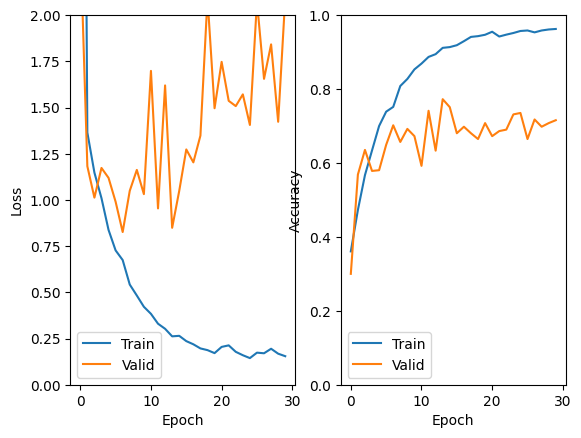

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])

plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'])

## Evaluation on Test Dataset

In [ ]:
loss, acc = net_1.evaluate(test_dataset)
print('Test Loss:', loss)
print("Test Accuracy", acc)

7/7 [==============================] - 1s 61ms/step - loss: 1.9682 - accuracy: 0.6875
Test Loss: 1.9681822061538696
Test Accuracy 0.6875


## Saving the model

In [ ]:
# Save model and history
net_1.save('/content/gdrive/MyDrive/FDL_Models/Model1')
np.save('/content/gdrive/MyDrive/FDL_Models/Model1_history.npy', history_1.history)

In [ ]:
# Upload history
path_history = '/content/gdrive/MyDrive/FDL_Models/Model1_history.npy'
Model1_history = np.load(path_history, allow_pickle=True).item()

# Upload model
Model1 = keras.models.load_model('/content/gdrive/MyDrive/FDL_Models/Model1')

## Model Summary and Architecture

In [ ]:
net_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 activation (Activation)     (None, None, None, 32)    0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 32)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 activation_1 (Activation)   (None, None, None, 64)    0         
                                                             

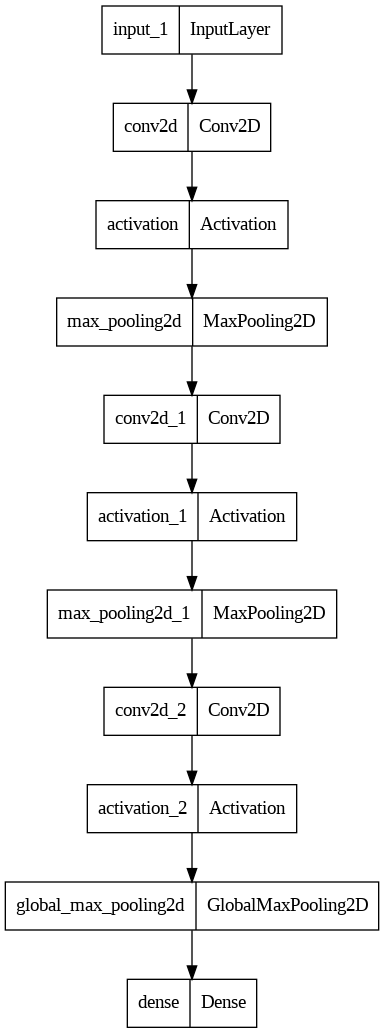

In [ ]:
keras.utils.plot_model(net_1, to_file='model.png')

## Prediction with Model 1

In [88]:
yc_pred1 = net_1.predict (test_dataset)
y_pred1 = np.argmax(yc_pred1, axis=1)

yc_test1 = np.concatenate([y for _, y in test_dataset], axis=0)
y_test1 = np.argmax(yc_test1, axis=1)

print (classification_report(y_test1, y_pred1))

7/7 [==============================] - 2s 117ms/step
              precision    recall  f1-score   support

           0       0.23      0.24      0.24        46
           1       0.15      0.12      0.13        51
           2       0.12      0.12      0.12        33
           3       0.20      0.25      0.22        44
           4       0.22      0.22      0.22        50

    accuracy                           0.19       224
   macro avg       0.19      0.19      0.19       224
weighted avg       0.19      0.19      0.19       224



# Model 2
* 3 2D Convolutional Layers: with 32, 64, and 128 filters and batch normalization for each layer.
* Output Layers : A dense (fully connected) layer
* Model Compilation: RMSprop optimizer with a learning rate of 0.001
* Model Training: - model is trained on training dataset.
 Validation dataset is used to monitor model's performance on unseen data during training.

In [ ]:
num_classes=5

# Architecture definition
inputs = keras.Input((None,None,3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
net_2 = keras.Model(inputs, outputs)

# Compile the model for training
net_2.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

# Model training
history_2 = net_2.fit(train_dataset,
          epochs=30,
          validation_data=val_dataset);

Epoch 1/30
92/92 [==============================] - 13s 109ms/step - loss: 1.1662 - accuracy: 0.5749 - val_loss: 1.6177 - val_accuracy: 0.4196
Epoch 2/30
92/92 [==============================] - 9s 92ms/step - loss: 0.7899 - accuracy: 0.6941 - val_loss: 0.7864 - val_accuracy: 0.6961
Epoch 3/30
92/92 [==============================] - 12s 122ms/step - loss: 0.6359 - accuracy: 0.7606 - val_loss: 0.6627 - val_accuracy: 0.7294
Epoch 4/30
92/92 [==============================] - 11s 118ms/step - loss: 0.5523 - accuracy: 0.7916 - val_loss: 0.7207 - val_accuracy: 0.7471
Epoch 5/30
92/92 [==============================] - 11s 109ms/step - loss: 0.4507 - accuracy: 0.8283 - val_loss: 0.8693 - val_accuracy: 0.6451
Epoch 6/30
92/92 [==============================] - 10s 98ms/step - loss: 0.4208 - accuracy: 0.8512 - val_loss: 0.6858 - val_accuracy: 0.7412
Epoch 7/30
92/92 [==============================] - 9s 91ms/step - loss: 0.3481 - accuracy: 0.8747 - val_loss: 0.6719 - val_accuracy: 0.7471
Epoc

## Learning Curves

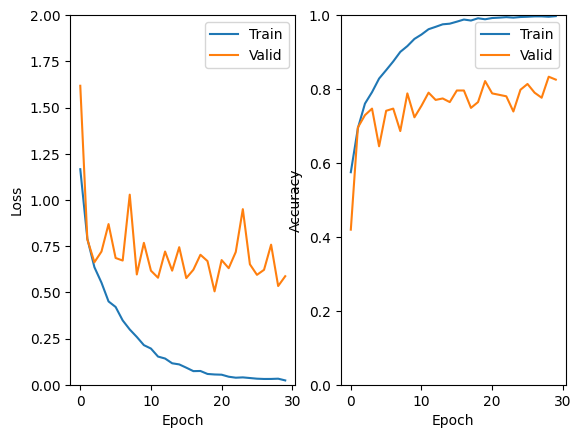

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])

plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'])

## Evaluation on Test Dataset

In [ ]:
loss, acc = net_2.evaluate(test_dataset)
print('Test Loss:', loss)
print("Test Accuracy", acc)

7/7 [==============================] - 1s 118ms/step - loss: 0.4101 - accuracy: 0.8705
Test Loss: 0.41007280349731445
Test Accuracy 0.8705357313156128


## Saving the model

In [ ]:
# Save model and history
net_2.save('/content/gdrive/MyDrive/FDL_Models/Model2')
np.save('/content/gdrive/MyDrive/FDL_Models/Model2_history.npy', history_2.history)

# Upload history
path_history = '/content/gdrive/MyDrive/FDL_Models/Model2_history.npy'
Model2_history = np.load(path_history, allow_pickle=True).item()

# Upload model
Model2 = keras.models.load_model('/content/gdrive/MyDrive/FDL_Models/Model2')

## Model Summary and Architecture

In [ ]:
net_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 32)    896       
                                                                 
 batch_normalization (BatchN  (None, None, None, 32)   128       
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, None, None, 32)    0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 64)    1849

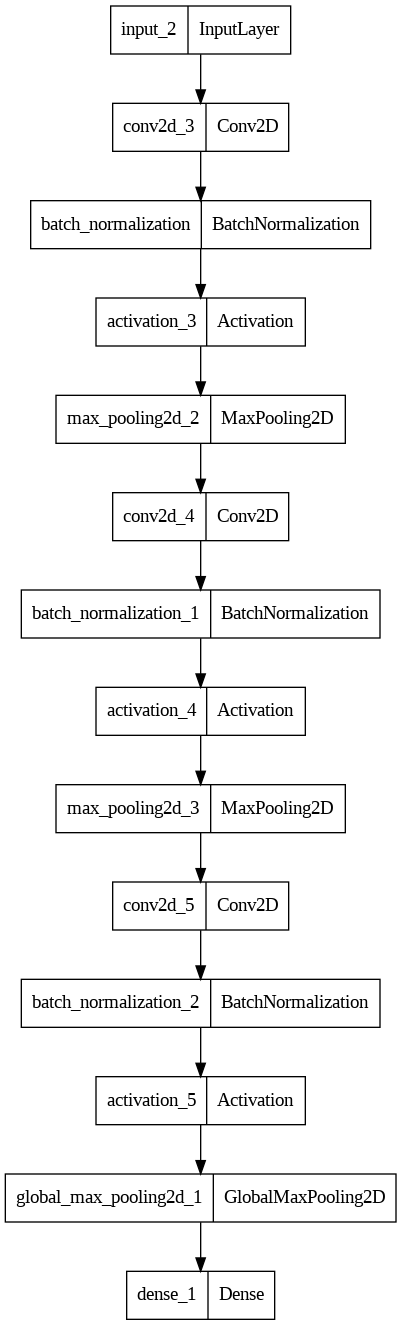

In [ ]:
keras.utils.plot_model(net_2, to_file='model2.png')

## Prediction with Model 2

In [89]:
yc_pred2 = net_2.predict (test_dataset)
y_pred2 = np.argmax(yc_pred2, axis=1)

yc_test2 = np.concatenate([y for _, y in test_dataset], axis=0)
y_test2 = np.argmax(yc_test2, axis=1)

print (classification_report(y_test2, y_pred2))

7/7 [==============================] - 1s 64ms/step
              precision    recall  f1-score   support

           0       0.22      0.25      0.24        40
           1       0.23      0.23      0.23        52
           2       0.18      0.16      0.17        37
           3       0.19      0.15      0.17        47
           4       0.30      0.35      0.33        48

    accuracy                           0.23       224
   macro avg       0.22      0.23      0.23       224
weighted avg       0.23      0.23      0.23       224



# Data Augmentation

In [28]:
data_augmentation = keras.Sequential(
    [   layers.RandomCrop(224, 224),
        layers.RandomFlip("horizontal"),
        layers.RandomContrast(0.25),
        layers.RandomZoom(0.3)
    ]
)

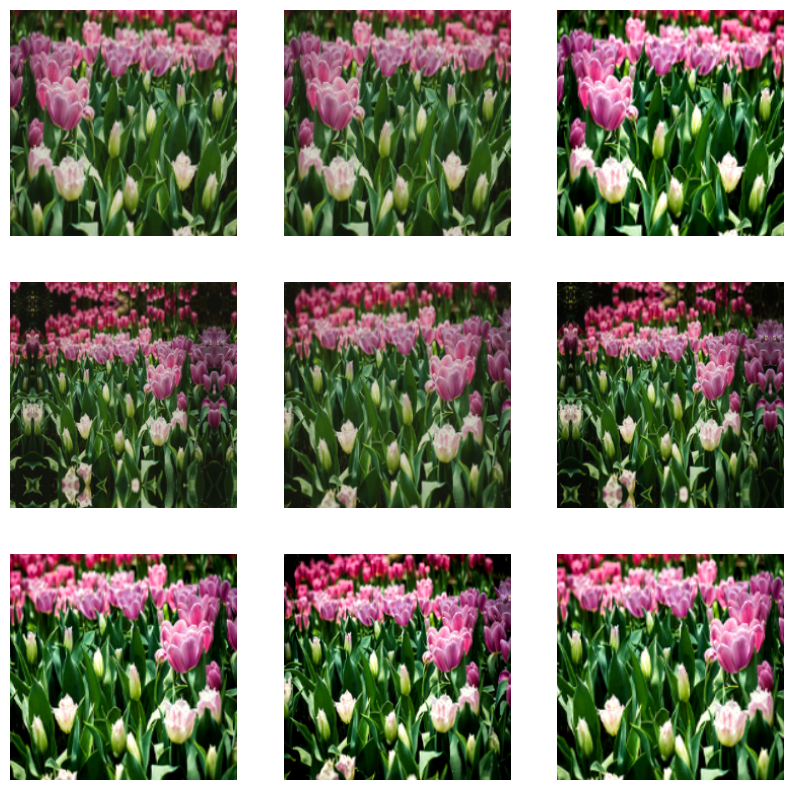

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# MODEL 3 (NOTE: THIS IS "SECOND MODEL" IN THE PRESENTATION) with Data Augmentation and Batch Normalization

* Data Augmentation
* 3 2D Convolutional Layers: with 32, 64, and 128 filters  (Batch Normalization is applied to the first two convolutional layers with filter 32 and 64)
* Output Layers : A dense (fully connected) layer
* Model Compilation: RMSprop optimizer with a learning rate of 0.001
* Model Training: - with 40 epochs

In [ ]:
num_classes=5

# Architecture definition
inputs = keras.Input((None,None,3))

x = inputs

x = keras.layers.RandomCrop(224, 224)(x)
x = keras.layers.RandomFlip(mode='horizontal')(x)
x = keras.layers.RandomContrast(0.25)(x)
x = keras.layers.RandomZoom(0.3)(x) #add zoom


x = keras.layers.Conv2D(32, 3, padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding='same')(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
net_3 = keras.Model(inputs, outputs)

# Compile the model for training
net_3.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

# Model training
history_3 = net_3.fit(train_dataset,
          epochs=40,
          validation_data=val_dataset);


Epoch 1/40
92/92 [==============================] - 14s 113ms/step - loss: 1.4903 - accuracy: 0.4973 - val_loss: 1.1915 - val_accuracy: 0.5078
Epoch 2/40
92/92 [==============================] - 14s 148ms/step - loss: 0.9984 - accuracy: 0.6083 - val_loss: 0.9067 - val_accuracy: 0.6569
Epoch 3/40
92/92 [==============================] - 12s 129ms/step - loss: 0.8958 - accuracy: 0.6543 - val_loss: 0.9337 - val_accuracy: 0.6118
Epoch 4/40
92/92 [==============================] - 14s 148ms/step - loss: 0.8243 - accuracy: 0.6792 - val_loss: 1.0945 - val_accuracy: 0.5882
Epoch 5/40
92/92 [==============================] - 13s 137ms/step - loss: 0.7808 - accuracy: 0.7003 - val_loss: 1.0567 - val_accuracy: 0.5941
Epoch 6/40
92/92 [==============================] - 11s 117ms/step - loss: 0.7631 - accuracy: 0.7061 - val_loss: 0.7183 - val_accuracy: 0.7255
Epoch 7/40
92/92 [==============================] - 12s 129ms/step - loss: 0.6989 - accuracy: 0.7282 - val_loss: 0.7293 - val_accuracy: 0.7118

## Learning Curves

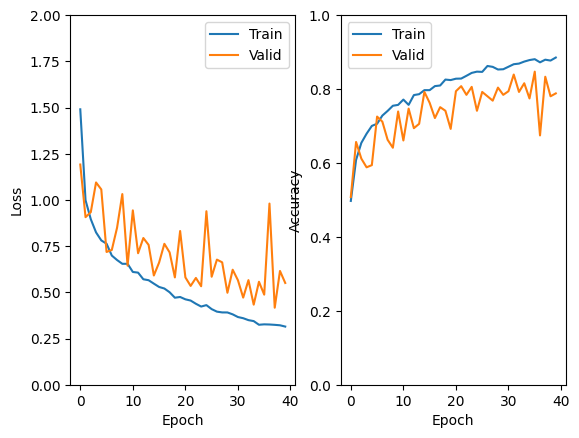

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])

plt.subplot(1, 2, 2)
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'])

## Evaluation on Test Dataset

In [ ]:
loss, acc = net_3.evaluate(test_dataset)
print('Test Loss:', loss)
print("Test Accuracy", acc)

7/7 [==============================] - 1s 61ms/step - loss: 0.4517 - accuracy: 0.8170
Test Loss: 0.45169323682785034
Test Accuracy 0.8169642686843872


## Saving the model

In [ ]:
# Save model and history
net_3.save('/content/gdrive/MyDrive/FDL_Models/Model3')
np.save('/content/gdrive/MyDrive/FDL_Models/Model3_history.npy', history_3.history)

# Upload history
path_history = '/content/gdrive/MyDrive/FDL_Models/Model3_history.npy'
Model3_history = np.load(path_history, allow_pickle=True).item()

# Upload model
Model3 = keras.models.load_model('/content/gdrive/MyDrive/FDL_Models/Model3')

## Model Summary and Architecture

In [ ]:
net_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 random_crop (RandomCrop)    (None, 224, 224, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_contrast (RandomCont  (None, 224, 224, 3)      0         
 rast)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                           

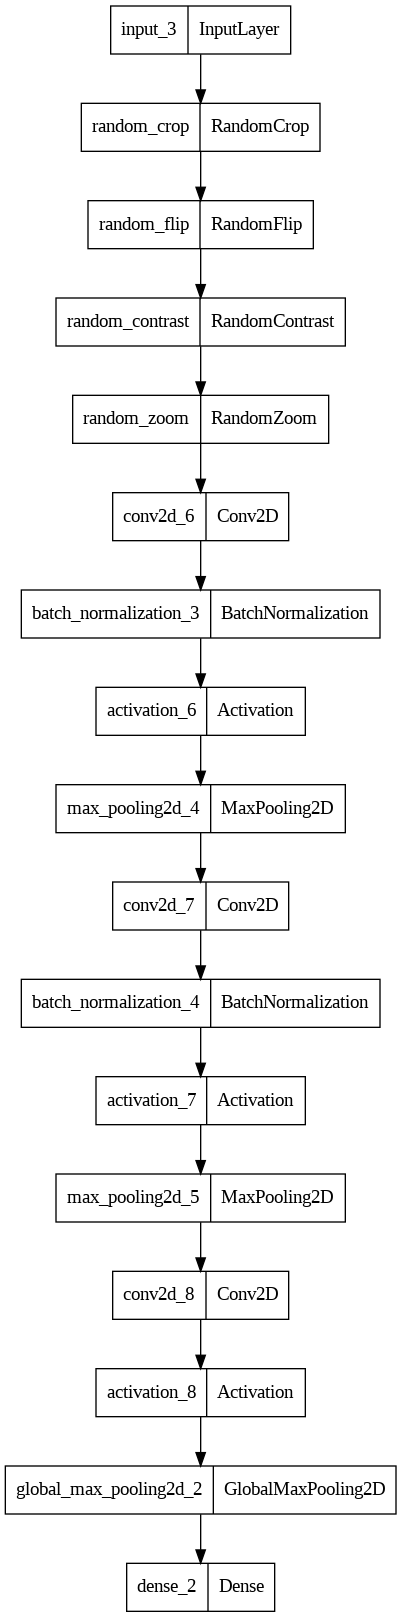

In [ ]:
keras.utils.plot_model(net_3, to_file='model3.png')

## Prediction with Model 3

In [90]:
yc_pred3 = net_3.predict (test_dataset)
y_pred3 = np.argmax(yc_pred3, axis=1)

yc_test3 = np.concatenate([y for _, y in test_dataset], axis=0)
y_test3 = np.argmax(yc_test3, axis=1)

print (classification_report(y_test3, y_pred3))

7/7 [==============================] - 1s 66ms/step
              precision    recall  f1-score   support

           0       0.26      0.26      0.26        47
           1       0.25      0.29      0.27        56
           2       0.25      0.23      0.24        35
           3       0.07      0.07      0.07        44
           4       0.19      0.19      0.19        42

    accuracy                           0.21       224
   macro avg       0.20      0.21      0.20       224
weighted avg       0.21      0.21      0.21       224



# MODEL 4 (NOTE: THIS IS "THIRD MODEL" IN THE PRESENTATUION) with Data Augmentation + Dropout + Rescaling

* Data Augmentation
* Rescale: used to scale the pixel values from the range [0, 255] to the range [0, 1]
* 4 2D Convolutional Layers: with 16, 32, 64, and 128 filters  (Batch Normalization is applied to 4 convolutional layers)
* Dropout is applied to the third convolutional layer;
* Output Layers : A dense (fully connected) layer;
* Model Compilation: RMSprop optimizer with a learning rate of 0.001
* Model Training: - with 40 epochs

In [ ]:
num_classes=5
inputs = keras.Input((None,None,3))

x = inputs

x = keras.layers.RandomCrop(224, 224)(x)
x = keras.layers.RandomFlip(mode='horizontal')(x)
x = keras.layers.RandomContrast(0.25)(x)
x = keras.layers.RandomZoom(0.3)(x)

x = keras.layers.Rescaling(1.0 / 255)(x)

x = keras.layers.Conv2D(16, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(32, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.3)(x)

x = keras.layers.Conv2D(128, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
net_4 = keras.Model(inputs, outputs)


# Compile the model for training
net_4.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

# Model training
history_4 = net_4.fit(train_dataset,
          epochs=40,
          validation_data=val_dataset);

Epoch 1/40
92/92 [==============================] - 14s 101ms/step - loss: 1.2360 - accuracy: 0.5330 - val_loss: 2.0537 - val_accuracy: 0.2176
Epoch 2/40
92/92 [==============================] - 12s 126ms/step - loss: 0.9534 - accuracy: 0.6400 - val_loss: 2.5265 - val_accuracy: 0.2137
Epoch 3/40
92/92 [==============================] - 10s 107ms/step - loss: 0.8832 - accuracy: 0.6686 - val_loss: 1.5059 - val_accuracy: 0.3431
Epoch 4/40
92/92 [==============================] - 13s 127ms/step - loss: 0.8043 - accuracy: 0.6945 - val_loss: 1.0182 - val_accuracy: 0.5686
Epoch 5/40
92/92 [==============================] - 14s 147ms/step - loss: 0.7603 - accuracy: 0.7108 - val_loss: 0.8237 - val_accuracy: 0.6765
Epoch 6/40
92/92 [==============================] - 12s 121ms/step - loss: 0.7168 - accuracy: 0.7275 - val_loss: 0.6197 - val_accuracy: 0.7549
Epoch 7/40
92/92 [==============================] - 16s 168ms/step - loss: 0.6918 - accuracy: 0.7486 - val_loss: 0.6898 - val_accuracy: 0.7549

## Learning Curves

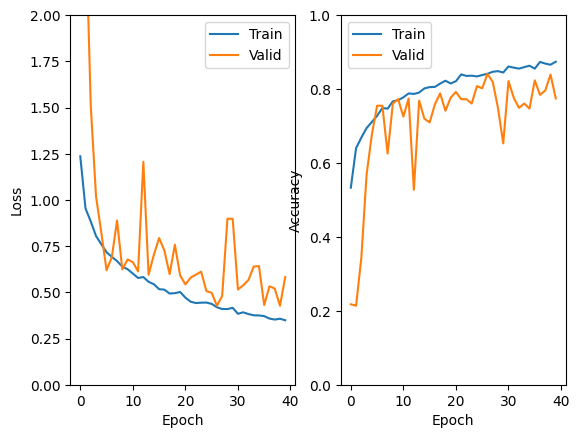

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])

plt.subplot(1, 2, 2)
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'])

## Evaluation on Test Dataset

In [ ]:
loss, acc = net_4.evaluate(test_dataset)
print('Test Loss:', loss)
print("Test Accuracy", acc)

7/7 [==============================] - 1s 73ms/step - loss: 0.4507 - accuracy: 0.8259
Test Loss: 0.4507300853729248
Test Accuracy 0.8258928656578064


## Saving the model

In [ ]:
# Save model and history
net_4.save('/content/gdrive/MyDrive/FDL_Models/Model4')
np.save('/content/gdrive/MyDrive/FDL_Models/Model4_history.npy', history_4.history)

# Upload history
path_history = '/content/gdrive/MyDrive/FDL_Models/Model4_history.npy'
Model4_history = np.load(path_history, allow_pickle=True).item()

# Upload model
Model4 = keras.models.load_model('/content/gdrive/MyDrive/FDL_Models/Model4')

## Model Summary and Architecture

In [ ]:
net_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 random_crop_1 (RandomCrop)  (None, 224, 224, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_contrast_1 (RandomCo  (None, 224, 224, 3)      0         
 ntrast)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                           

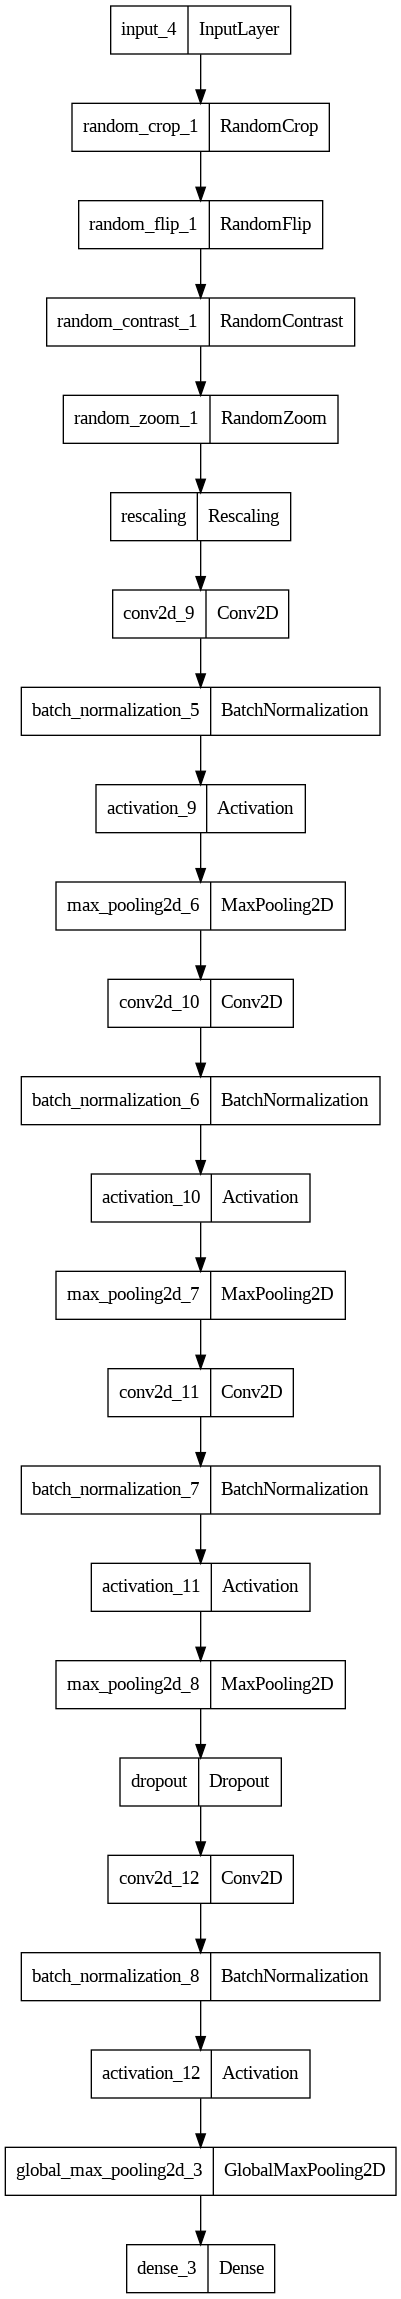

In [ ]:
keras.utils.plot_model(net_4, to_file='model4.png')

## Prediction with Model 4

In [91]:
yc_pred4 = net_4.predict (test_dataset)
y_pred4 = np.argmax(yc_pred1, axis=1)

yc_test4 = np.concatenate([y for _, y in test_dataset], axis=0)
y_test4 = np.argmax(yc_test4, axis=1)

print (classification_report(y_test4, y_pred4))

7/7 [==============================] - 1s 62ms/step
              precision    recall  f1-score   support

           0       0.11      0.12      0.11        41
           1       0.31      0.22      0.26        54
           2       0.25      0.21      0.23        39
           3       0.11      0.16      0.13        37
           4       0.25      0.25      0.25        53

    accuracy                           0.20       224
   macro avg       0.21      0.19      0.20       224
weighted avg       0.22      0.20      0.20       224



# MODEL 5 (NOTE: THIS IS "FOURTH MODEL" IN THE PRESENTATION)

* Data Augmentation
* Rescale: used to scale the pixel values from the range [0, 255] to the range [0, 1]
* 3 2D Convolutional Layers: with 32, 64, and 128 filters  (Batch Normalization is applied to 3 convolutional layers.)
* Dropout is applied to the second convolutional layer;
* Output Layers : A dense (fully connected) layer
* Model Compilation: RMSprop optimizer with a learning rate of 0.001
* Model Training: - with 40 epochs

In [14]:
num_classes=5
inputs = keras.Input((None,None,3))

x = inputs

x = keras.layers.RandomCrop(224, 224)(x)
x = keras.layers.RandomFlip(mode='horizontal')(x)
x = keras.layers.RandomContrast(0.25)(x)
x = keras.layers.RandomZoom(0.3)(x)

x = keras.layers.Rescaling(1.0 / 255)(x)

x = keras.layers.Conv2D(32, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.3)(x)

x = keras.layers.Conv2D(128, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
net_5 = keras.Model(inputs, outputs)


# Compile the model for training
net_5.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

# Model training
history_5 = net_5.fit(train_dataset,
          epochs=40,
          validation_data=val_dataset);

Epoch 1/40
92/92 [==============================] - 15s 124ms/step - loss: 1.2913 - accuracy: 0.5354 - val_loss: 1.8030 - val_accuracy: 0.2137
Epoch 2/40
92/92 [==============================] - 12s 125ms/step - loss: 0.9821 - accuracy: 0.6240 - val_loss: 1.6055 - val_accuracy: 0.2765
Epoch 3/40
92/92 [==============================] - 12s 124ms/step - loss: 0.8666 - accuracy: 0.6700 - val_loss: 1.3529 - val_accuracy: 0.4176
Epoch 4/40
92/92 [==============================] - 12s 121ms/step - loss: 0.8250 - accuracy: 0.6775 - val_loss: 1.1421 - val_accuracy: 0.5078
Epoch 5/40
92/92 [==============================] - 11s 119ms/step - loss: 0.7536 - accuracy: 0.7084 - val_loss: 0.9440 - val_accuracy: 0.6431
Epoch 6/40
92/92 [==============================] - 11s 110ms/step - loss: 0.7361 - accuracy: 0.7200 - val_loss: 1.2089 - val_accuracy: 0.5294
Epoch 7/40
92/92 [==============================] - 12s 122ms/step - loss: 0.6903 - accuracy: 0.7340 - val_loss: 0.7795 - val_accuracy: 0.7098

## Learning Curves

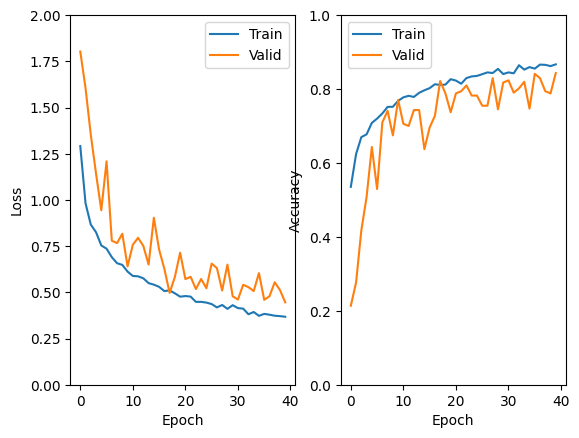

In [15]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])

plt.subplot(1, 2, 2)
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'])

## Evaluation on Test Dataset

In [16]:
loss, acc = net_5.evaluate(test_dataset)
print('Test Loss:', loss)
print("Test Accuracy", acc)

7/7 [==============================] - 1s 66ms/step - loss: 0.3973 - accuracy: 0.8438
Test Loss: 0.3972659707069397
Test Accuracy 0.84375


## Saving the model

In [17]:
# Save model and history
net_5.save('/content/gdrive/MyDrive/FDL_Models/Model5')
np.save('/content/gdrive/MyDrive/FDL_Models/Model5_history.npy', history_5.history)

# Upload history
path_history = '/content/gdrive/MyDrive/FDL_Models/Model5_history.npy'
Model5_history = np.load(path_history, allow_pickle=True).item()

# Upload model
Model5 = keras.models.load_model('/content/gdrive/MyDrive/FDL_Models/Model5')

## Model Summary and Architecture

In [18]:
net_5.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 random_crop_1 (RandomCrop)  (None, 224, 224, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_contrast_1 (RandomCo  (None, 224, 224, 3)      0         
 ntrast)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                           

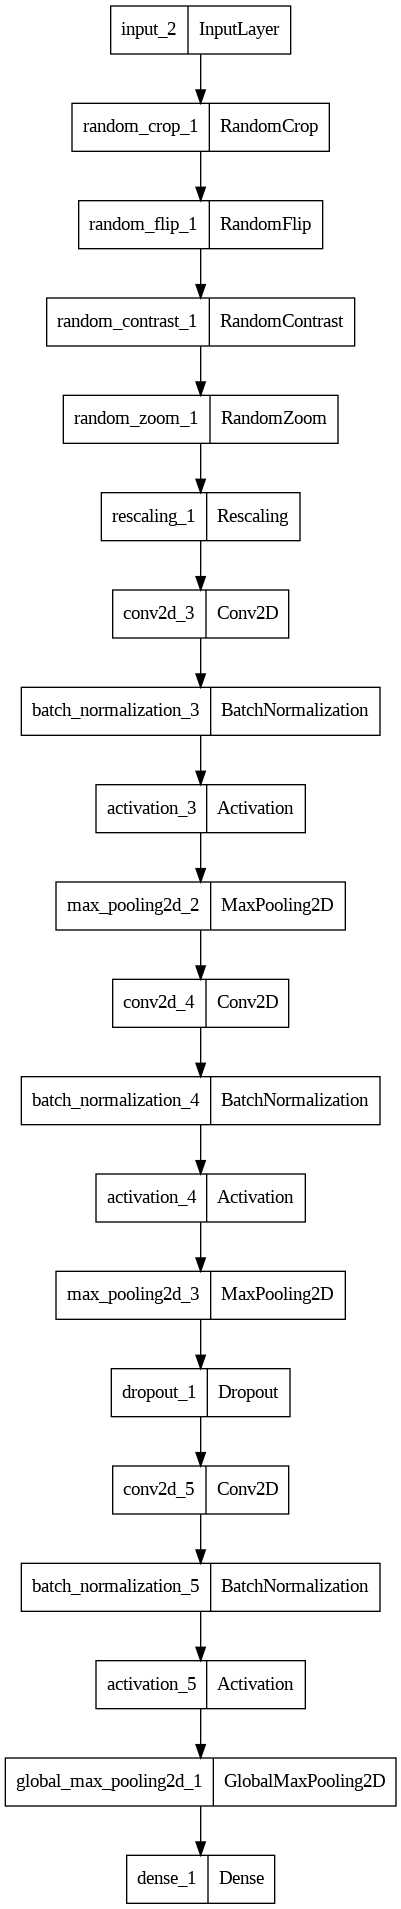

In [19]:
keras.utils.plot_model(net_5, to_file='model5.png')

## Prediction with Model 5

In [24]:
yc_pred5 = net_5.predict (test_dataset)
y_pred5 = np.argmax(yc_pred5, axis=1)

yc_test5 = np.concatenate([y for _, y in test_dataset], axis=0)
y_test5 = np.argmax(yc_test5, axis=1)

print (classification_report(y_test5, y_pred5))

7/7 [==============================] - 1s 65ms/step
              precision    recall  f1-score   support

           0       0.27      0.23      0.25        44
           1       0.33      0.31      0.32        55
           2       0.22      0.26      0.24        46
           3       0.13      0.15      0.14        40
           4       0.26      0.23      0.24        39

    accuracy                           0.24       224
   macro avg       0.24      0.24      0.24       224
weighted avg       0.25      0.24      0.24       224



### Visualizing predictions

In [20]:
def plot_predicted(model, test_dataset):
  for images, labels in test_dataset.take(1):
      yhat = model.predict(images, verbose=0)
      y_pred = yhat.argmax(axis=1)

      batch_size = images.shape[0]
      num_rows = math.ceil(batch_size / 4)
      num_cols = 4

      plt.figure(figsize=(12, 12))

      for i in range(batch_size):
          plt.subplot(num_rows, num_cols, i + 1)
          plt.grid(False)
          plt.imshow(images[i].numpy().astype("uint8"))
          class_index = np.argmax(labels[i])  # convert one-hot label to class index
          plt.title('Real class: {} \n Predicted: {}'.format(class_names[class_index], class_names[y_pred[i]]))
          plt.axis("off")

      plt.tight_layout()
      plt.show()

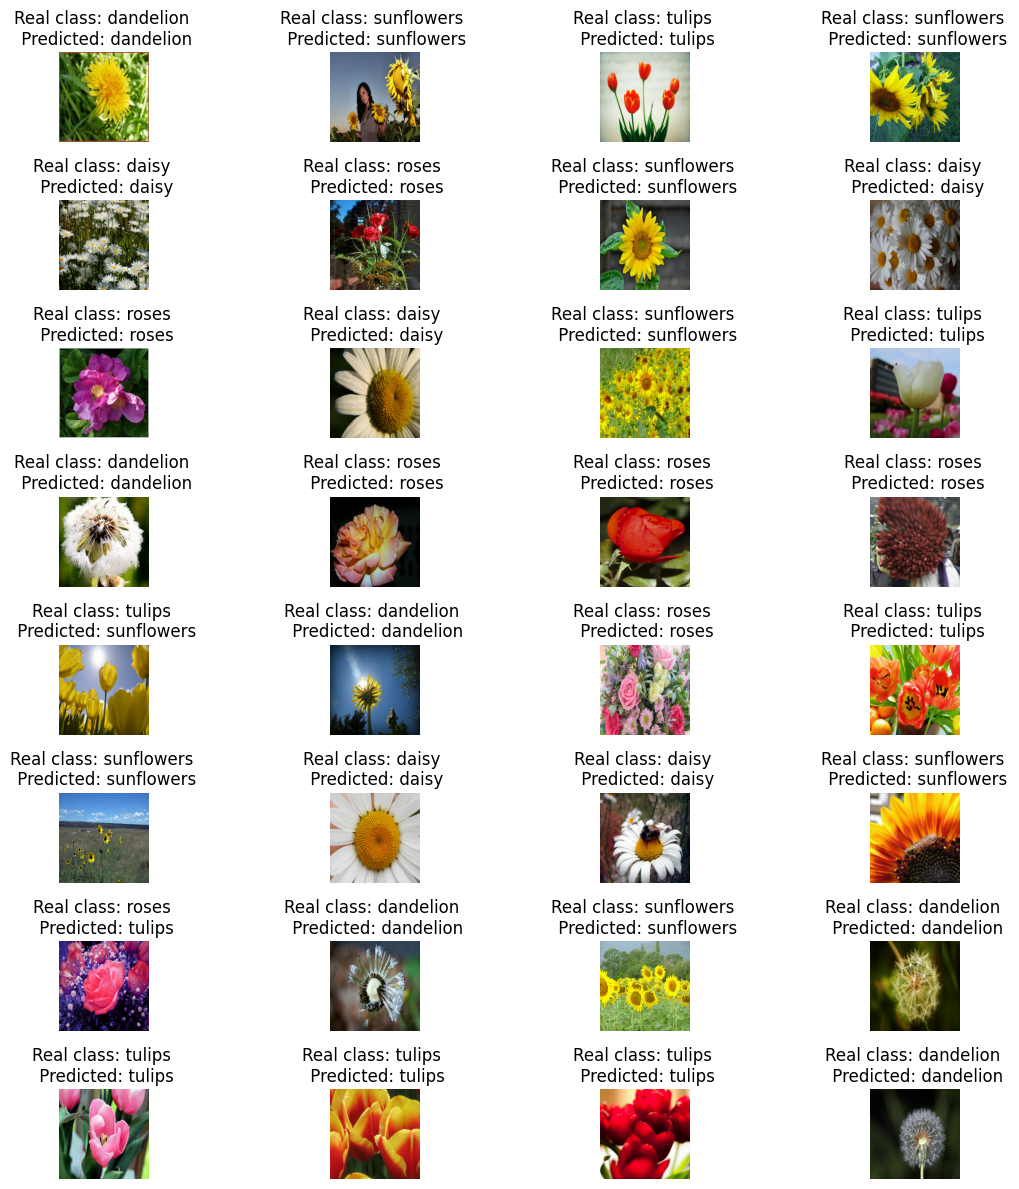

In [21]:
plot_predicted(net_5, test_dataset)

### Confusion Matrix

Confusion matrix:


Text(0, 0.5, 'Predicted Class')

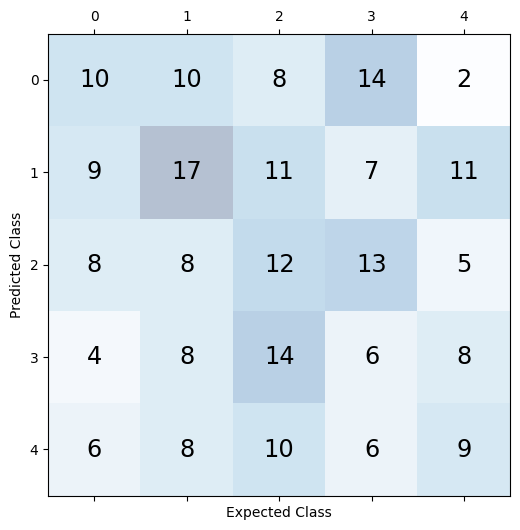

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
# Confusion matrix
print('Confusion matrix:')
conf_m = confusion_matrix(y_test5, y_pred5)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_m, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_m.shape[0]):
    for j in range(conf_m.shape[1]):
        ax.text(x=j, y=i,s=conf_m[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Expected Class')
plt.ylabel('Predicted Class')

# Model 6 (equal to model 5 but with regularization)

* Data Augmentation
* Rescale: used to scale the pixel values from the range [0, 255] to the range [0, 1]
* 3 2D Convolutional Layers: with 32, 64, and 128 filters  (Batch Normalization is applied to 3 convolutional layers)
* Dropout is applied to the second convolutional layer;
* Output Layers : A dense (fully connected) layer
* Model Compilation: RMSprop optimizer with a learning rate of 0.001
* Model Training: - with 40 epochs

In [47]:
num_classes=5
inputs = keras.Input((None,None,3))

x = inputs

x = keras.layers.RandomCrop(224, 224)(x)
x = keras.layers.RandomFlip(mode='horizontal')(x)
x = keras.layers.RandomContrast(0.25)(x)
x = keras.layers.RandomZoom(0.3)(x)

x = keras.layers.Rescaling(1.0 / 255)(x)

x = keras.layers.Conv2D(32, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.3)(x)

x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
net_6 = keras.Model(inputs, outputs)


# Compile the model for training
net_6.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

# Model training
history_6 = net_6.fit(train_dataset,
          epochs=40,
          validation_data=val_dataset);

Epoch 1/40
92/92 [==============================] - 14s 117ms/step - loss: 1.4710 - accuracy: 0.5191 - val_loss: 1.8477 - val_accuracy: 0.2529
Epoch 2/40
92/92 [==============================] - 11s 110ms/step - loss: 1.1520 - accuracy: 0.6090 - val_loss: 1.8451 - val_accuracy: 0.2706
Epoch 3/40
92/92 [==============================] - 11s 115ms/step - loss: 1.0486 - accuracy: 0.6454 - val_loss: 1.4611 - val_accuracy: 0.4196
Epoch 4/40
92/92 [==============================] - 11s 114ms/step - loss: 0.9540 - accuracy: 0.6924 - val_loss: 1.2029 - val_accuracy: 0.5569
Epoch 5/40
92/92 [==============================] - 11s 115ms/step - loss: 0.9322 - accuracy: 0.6982 - val_loss: 1.1193 - val_accuracy: 0.6020
Epoch 6/40
92/92 [==============================] - 10s 107ms/step - loss: 0.8806 - accuracy: 0.7176 - val_loss: 1.1151 - val_accuracy: 0.6176
Epoch 7/40
92/92 [==============================] - 11s 116ms/step - loss: 0.8508 - accuracy: 0.7350 - val_loss: 0.8524 - val_accuracy: 0.7196

## Learning Curves

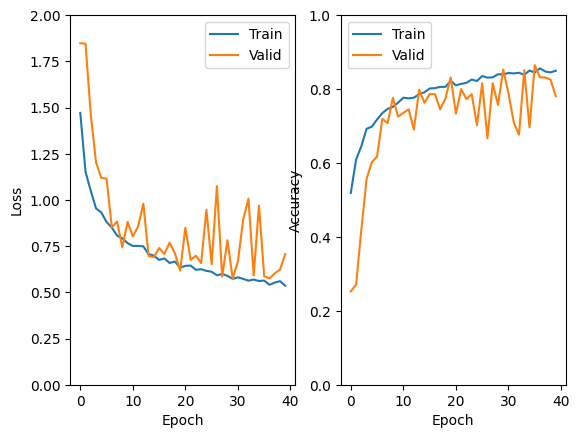

In [48]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])

plt.subplot(1, 2, 2)
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'])

## Evaluation on Test Dataset

In [49]:
loss, acc = net_6.evaluate(test_dataset)
print('Test Loss:', loss)
print("Test Accuracy", acc)

7/7 [==============================] - 1s 69ms/step - loss: 0.7024 - accuracy: 0.7946
Test Loss: 0.7024357914924622
Test Accuracy 0.7946428656578064


## Saving the model

In [50]:
# Save model and history
net_6.save('/content/gdrive/MyDrive/FDL_Models/Model6')
np.save('/content/gdrive/MyDrive/FDL_Models/Model6_history.npy', history_6.history)

# Upload history
path_history = '/content/gdrive/MyDrive/FDL_Models/Model6_history.npy'
Model6_history = np.load(path_history, allow_pickle=True).item()

# Upload model
Model6 = keras.models.load_model('/content/gdrive/MyDrive/FDL_Models/Model6')

## Model Summary and Architecture

In [51]:
net_6.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 random_crop_5 (RandomCrop)  (None, 224, 224, 3)       0         
                                                                 
 random_flip_5 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_contrast_5 (RandomCo  (None, 224, 224, 3)      0         
 ntrast)                                                         
                                                                 
 random_zoom_5 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                           

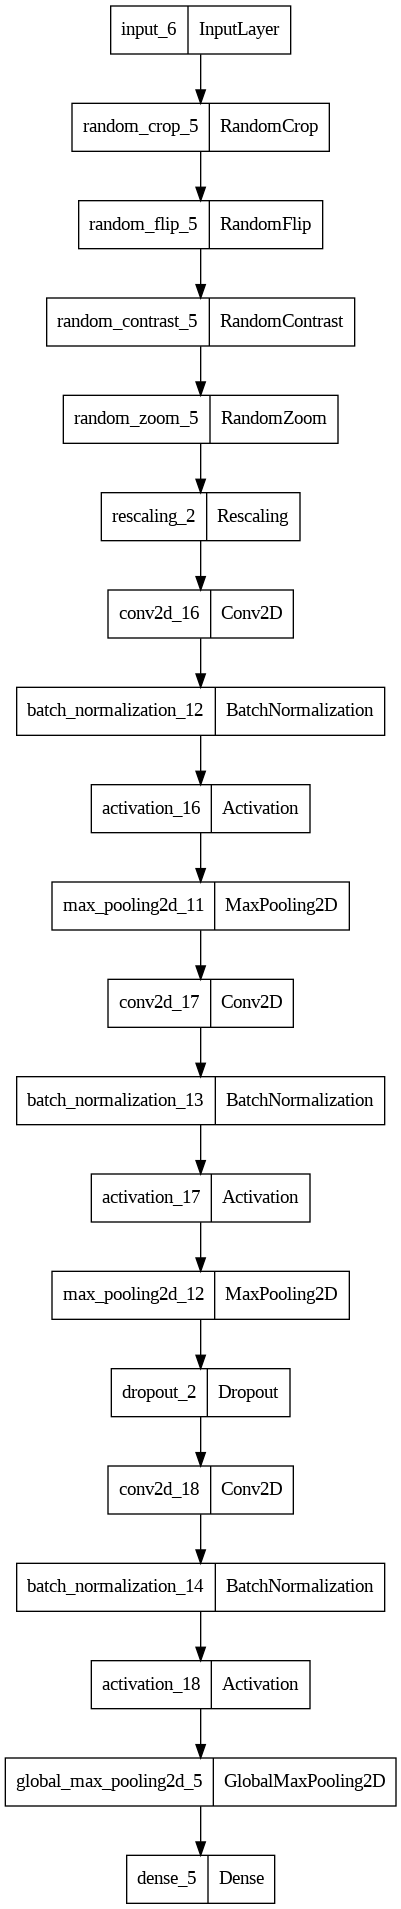

In [52]:
keras.utils.plot_model(net_6, to_file='model5.png')

## Prediction with Model 6

In [93]:
yc_pred6 = net_6.predict (test_dataset)
y_pred6 = np.argmax(yc_pred6, axis=1)

yc_test6 = np.concatenate([y for _, y in test_dataset], axis=0)
y_test6 = np.argmax(yc_test6, axis=1)

print (classification_report(y_test6, y_pred6))

7/7 [==============================] - 1s 63ms/step
              precision    recall  f1-score   support

           0       0.15      0.14      0.15        43
           1       0.33      0.40      0.36        50
           2       0.26      0.18      0.21        34
           3       0.26      0.18      0.21        50
           4       0.18      0.26      0.21        47

    accuracy                           0.24       224
   macro avg       0.24      0.23      0.23       224
weighted avg       0.24      0.24      0.23       224



# Model 7 - Addititional  fully connected layer

* Data Augmentation
* Rescale: used to scale the pixel values from the range [0, 255] to the range [0, 1]
* 3 2D Convolutional Layers: with 32, 64, and 128 filters and Batch normalization for each layer
* Dense Layers: with 64 units and the ReLU activation
* Output Layers : A dense (fully connected) layer
* Model Compilation: RMSprop optimizer with a learning rate of 0.001
* Model Training: - with 40 epochs

In [30]:
num_classes=5

# Architecture definition
inputs = keras.Input((None,None,3))

x = inputs

x = keras.layers.RandomCrop(224, 224)(x)
x = keras.layers.RandomFlip(mode='horizontal')(x)
x = keras.layers.RandomContrast(0.25)(x)
x = keras.layers.RandomZoom(0.3)(x)

x = keras.layers.Rescaling(1.0 / 255)(x)

x = keras.layers.Conv2D(32, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

outputs = keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net_7 = keras.Model(inputs, outputs)

# Compile the model for training
net_7.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

# Model training (v3)
history_7 = net_7.fit(train_dataset,
          epochs= 40,
          validation_data=val_dataset);

Epoch 1/40
92/92 [==============================] - 13s 111ms/step - loss: 1.3397 - accuracy: 0.5668 - val_loss: 2.0162 - val_accuracy: 0.2098
Epoch 2/40
92/92 [==============================] - 11s 112ms/step - loss: 1.0721 - accuracy: 0.6580 - val_loss: 1.9253 - val_accuracy: 0.3196
Epoch 3/40
92/92 [==============================] - 14s 145ms/step - loss: 0.9746 - accuracy: 0.6948 - val_loss: 2.0078 - val_accuracy: 0.3275
Epoch 4/40
92/92 [==============================] - 11s 115ms/step - loss: 0.9241 - accuracy: 0.7098 - val_loss: 1.0443 - val_accuracy: 0.6647
Epoch 5/40
92/92 [==============================] - 19s 185ms/step - loss: 0.8675 - accuracy: 0.7391 - val_loss: 1.0799 - val_accuracy: 0.6059
Epoch 6/40
92/92 [==============================] - 13s 131ms/step - loss: 0.8342 - accuracy: 0.7432 - val_loss: 0.8113 - val_accuracy: 0.7725
Epoch 7/40
92/92 [==============================] - 12s 128ms/step - loss: 0.7844 - accuracy: 0.7636 - val_loss: 0.8055 - val_accuracy: 0.7333

## Learning Curves

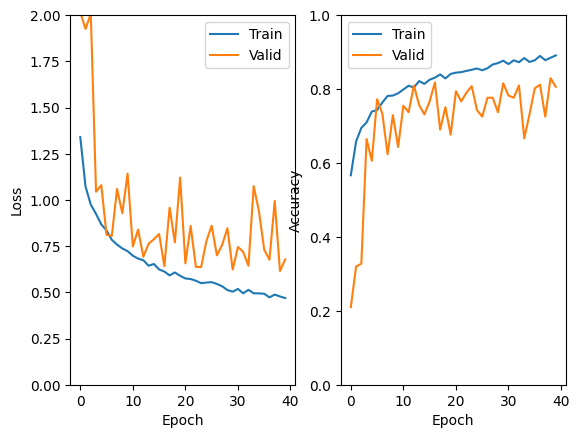

In [31]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])

plt.subplot(1, 2, 2)
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'])

## Evaluation on Test Dataset

In [32]:
loss, acc = net_7.evaluate(test_dataset)
print('Test Loss:', loss)
print("Test Accuracy", acc)

7/7 [==============================] - 1s 66ms/step - loss: 0.6127 - accuracy: 0.8259
Test Loss: 0.6127092242240906
Test Accuracy 0.8258928656578064


## Saving the model

In [33]:
# Save model and history
net_7.save('/content/gdrive/MyDrive/FDL_Models/Model7')
np.save('/content/gdrive/MyDrive/FDL_Models/Model7_history.npy', history_7.history)

# Upload history
path_history = '/content/gdrive/MyDrive/FDL_Models/Model7_history.npy'
Model7_history = np.load(path_history, allow_pickle=True).item()

# Upload model
Model7 = keras.models.load_model('/content/gdrive/MyDrive/FDL_Models/Model7')

## Model Summary and Architecture

In [34]:
net_7.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 random_crop_4 (RandomCrop)  (None, 224, 224, 3)       0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_contrast_4 (RandomCo  (None, 224, 224, 3)      0         
 ntrast)                                                         
                                                                 
 random_zoom_4 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                           

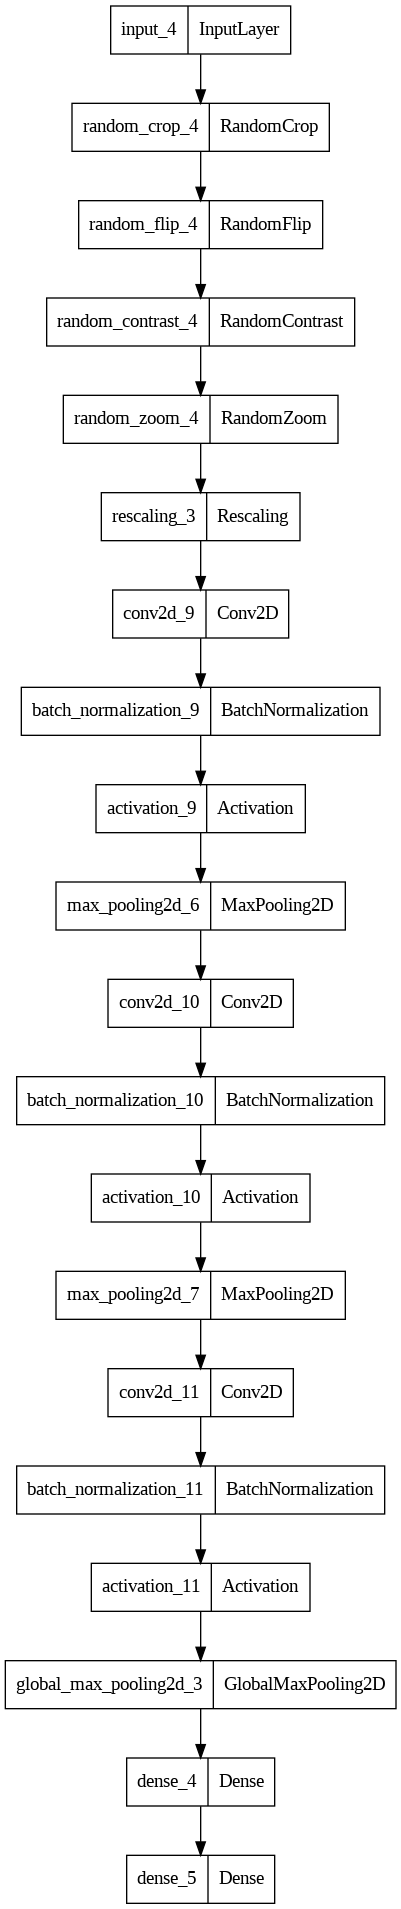

In [35]:
keras.utils.plot_model(net_7, to_file='model7.png')

## Prediction with Model 7

In [36]:
yc_pred7 = net_7.predict (test_dataset)
y_pred7 = np.argmax(yc_pred7, axis=1)

yc_test7 = np.concatenate([y for _, y in test_dataset], axis=0)
y_test7 = np.argmax(yc_test7, axis=1)

print (classification_report(y_test7, y_pred7))

7/7 [==============================] - 1s 66ms/step
              precision    recall  f1-score   support

           0       0.17      0.13      0.15        45
           1       0.23      0.21      0.22        52
           2       0.33      0.19      0.24        43
           3       0.15      0.15      0.15        39
           4       0.16      0.27      0.20        45

    accuracy                           0.19       224
   macro avg       0.21      0.19      0.19       224
weighted avg       0.21      0.19      0.19       224



# Pretrained Model


In [53]:
from tensorflow.python.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix

## ResNet50

In [67]:
resnet_model =  Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                  input_shape=(227,227,3),
                                                  pooling='avg',
                                                  classes = 5,
                                                  weights = 'imagenet')

for layer in pretrained_model.layers:
  layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Dense(512,activation="relu"))
resnet_model.add(Dense(5,activation="softmax"))

In [68]:
# Compile the model for training
resnet_model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

# Model training
history_resnet = resnet_model.fit(train_dataset,
                                  epochs=3,
                                  validation_data=val_dataset)

Epoch 1/3
92/92 [==============================] - 17s 146ms/step - loss: 0.9627 - accuracy: 0.7354 - val_loss: 0.4545 - val_accuracy: 0.8137
Epoch 2/3
92/92 [==============================] - 13s 133ms/step - loss: 0.4103 - accuracy: 0.8600 - val_loss: 0.6913 - val_accuracy: 0.7588
Epoch 3/3
92/92 [==============================] - 13s 133ms/step - loss: 0.2933 - accuracy: 0.8954 - val_loss: 0.3947 - val_accuracy: 0.8627


### Learning Curves

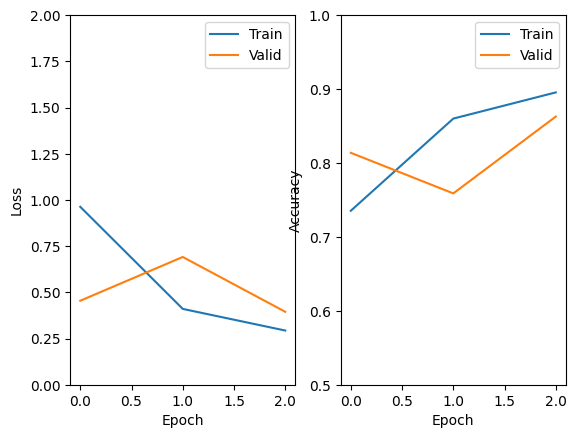

In [69]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'])

### Evaluation on Test Dataset

In [70]:
loss, acc = resnet_model.evaluate(test_dataset)
print('Test Loss:', loss)
print("Test Accuracy", acc)

7/7 [==============================] - 1s 109ms/step - loss: 0.2373 - accuracy: 0.9062
Test Loss: 0.2372976541519165
Test Accuracy 0.90625


### Saving the model

In [71]:
# Save model and history
resnet_model.save('/content/gdrive/MyDrive/FDL_Models/ResNet50')
np.save('/content/gdrive/MyDrive/FDL_Models/ResNet50_history.npy', history_resnet.history)

# Upload history
path_history = '/content/gdrive/MyDrive/FDL_Models/ResNet50_history.npy'
ResNet50_history = np.load(path_history, allow_pickle=True).item()

# Upload model
ResNet50 = keras.models.load_model('/content/gdrive/MyDrive/FDL_Models/ResNet50')

### Model Summary

In [72]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_8 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_9 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


### Prediction with ReNet50

In [94]:
yc_predres = resnet_model.predict (test_dataset)
y_predres = np.argmax(yc_predres, axis=1)

yc_testres = np.concatenate([y for _, y in test_dataset], axis=0)
y_testres = np.argmax(yc_testres, axis=1)

print (classification_report(y_testres, y_predres))

7/7 [==============================] - 2s 107ms/step
              precision    recall  f1-score   support

           0       0.03      0.03      0.03        37
           1       0.29      0.25      0.27        60
           2       0.18      0.18      0.18        45
           3       0.17      0.23      0.19        31
           4       0.23      0.22      0.22        51

    accuracy                           0.19       224
   macro avg       0.18      0.18      0.18       224
weighted avg       0.19      0.19      0.19       224



# Trained Models Drive Links

* Models Drive Link: [Click here to access the Google Drive file](https://drive.google.com/drive/folders/1ns2jy8vFKlPdy7emyIMmj3zBDNXQc8HV?usp=sharing)

# Additional Models developed from scratch can be found at:

* Colab Link: [Click here to access the Google Drive file](https://drive.google.com/file/d/185ZVmPEFsnrF24BZCS2JTUywkJ0nbSJq/view?usp=sharing)
* Drive Link of the models: [Click here to access the Google Drive file](https://drive.google.com/drive/folders/1xJNkhx5x3qjJqcbPgXeMzb0YhWuPls2r?usp=sharing)